In [175]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [18]:
data_path = 'E:/ITI/labs/Machine Learning 2/project/data/marketing_campaign.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path,sep=";")

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (2240, 29)


In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Problems 

### 1. NA Values 

### 2. There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

In [21]:
df = df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [23]:
len(df)

2216

In [26]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))                                       

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [51]:
# the number of days the customers started to shop in the store relative to the last recorded date
days = []
max_date = max(dates)
for i in dates:
    new_day = max_date - i
    days.append(new_day)
df['Customer_Days'] = days
df['Customer_Days'] = pd.to_numeric(df['Customer_Days'].dt.days, downcast='integer' , errors="coerce")    

In [52]:
days

[datetime.timedelta(days=663),
 datetime.timedelta(days=113),
 datetime.timedelta(days=312),
 datetime.timedelta(days=139),
 datetime.timedelta(days=161),
 datetime.timedelta(days=293),
 datetime.timedelta(days=593),
 datetime.timedelta(days=417),
 datetime.timedelta(days=388),
 datetime.timedelta(days=108),
 datetime.timedelta(days=593),
 datetime.timedelta(days=226),
 datetime.timedelta(days=226),
 datetime.timedelta(days=627),
 datetime.timedelta(days=582),
 datetime.timedelta(days=552),
 datetime.timedelta(days=667),
 datetime.timedelta(days=458),
 datetime.timedelta(days=603),
 datetime.timedelta(days=690),
 datetime.timedelta(days=539),
 datetime.timedelta(days=553),
 datetime.timedelta(days=169),
 datetime.timedelta(days=468),
 datetime.timedelta(days=543),
 datetime.timedelta(days=398),
 datetime.timedelta(days=394),
 datetime.timedelta(days=219),
 datetime.timedelta(days=38),
 datetime.timedelta(days=414),
 datetime.timedelta(days=627),
 datetime.timedelta(days=608),
 datetime

In [50]:
df['Customer_Days'] 

0       57283200000000000
1        9763200000000000
2       26956800000000000
3       12009600000000000
4       13910400000000000
              ...        
2235    32918400000000000
2236     1641600000000000
2237    13392000000000000
2238    13478400000000000
2239    53740800000000000
Name: Customer_Days, Length: 2216, dtype: int64

In [53]:
df['Customer_Days'] 

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Customer_Days, Length: 2216, dtype: int16

In [38]:
df["Marital_Status"]

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2216, dtype: object

In [40]:
df["Education"]

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2216, dtype: object

In [42]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [72]:
#Age of customer today 
df['Age'] = 2022 - df['Year_Birth']
#Total spendings on various items
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']
#Deriving living situation by marital status"Alone"
df['Living_With'] = df['Marital_Status'].replace({"Married":"Partner" , "Together":"Partner" , "Single":"Alone" , "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone"})
#Feature indicating total children living in the household
df['Children'] = df['Kidhome'] + df['Teenhome']
#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1 , "Partner": 2}) + df['Children'] 
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
#Segmenting education levels in three groups
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [69]:
df["Family_Size"]

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

In [70]:
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

In [73]:
df["Education"] 

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education, Length: 2216, dtype: object

In [79]:
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2216, dtype: int64

In [74]:
#For clarity
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [76]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [78]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,353.521209,53.179603,563.110108,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,577.183371,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,4.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,45.000000,55.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,355.500000,52.000000,342.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,63.000000,964.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,129.000000,2491.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

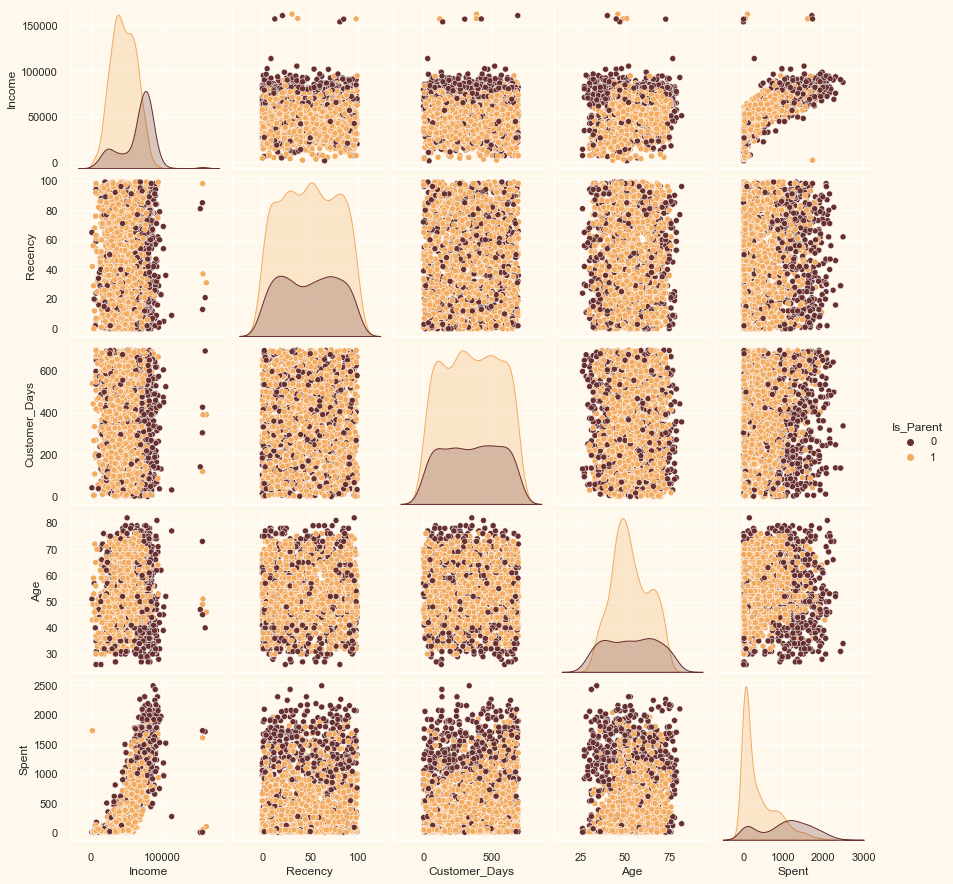

In [85]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_Days", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [81]:
# to remove outliers 
df = df[(df['Income'] < 600000)]
df = df[(df['Age'] < 85)]

In [82]:
len(df)

2212

<AxesSubplot:>

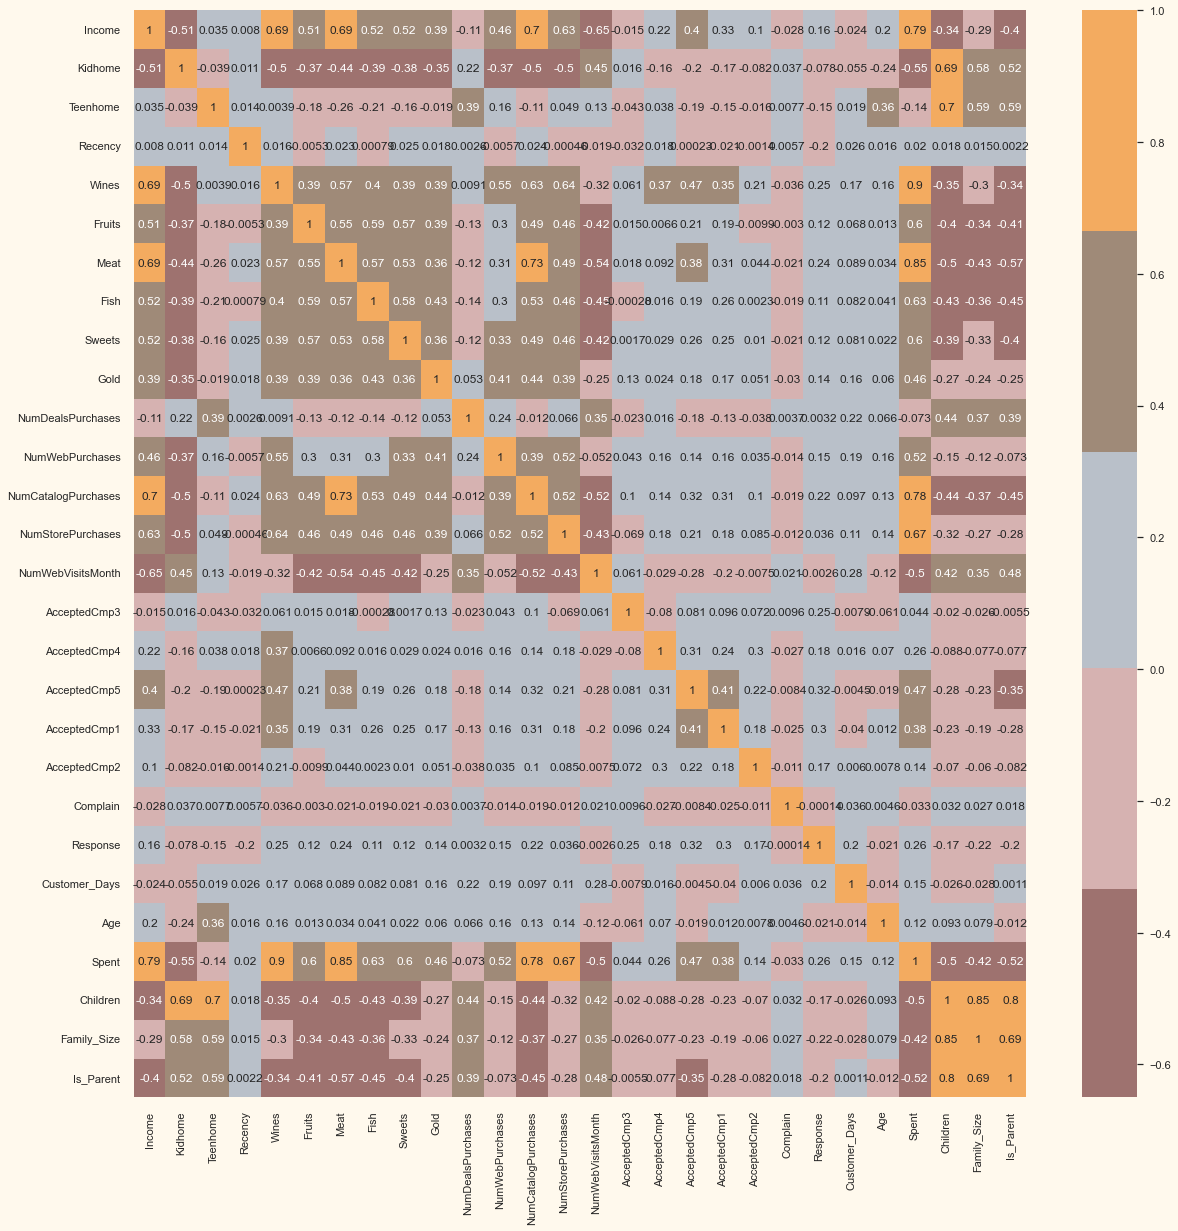

In [87]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [92]:
#Label Encoding the object dtypes
Education_columns = pd.get_dummies(df['Education'], prefix='Education')
Living_With_columns = pd.get_dummies(df['Living_With'], prefix='Living_With')

In [93]:
df = pd.concat([df, Education_columns], axis=1)
df = pd.concat([df, Living_With_columns], axis=1)

In [94]:
df = df.drop(['Education' , 'Living_With'] , axis = 1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Kidhome                  2212 non-null   int64  
 2   Teenhome                 2212 non-null   int64  
 3   Recency                  2212 non-null   int64  
 4   Wines                    2212 non-null   int64  
 5   Fruits                   2212 non-null   int64  
 6   Meat                     2212 non-null   int64  
 7   Fish                     2212 non-null   int64  
 8   Sweets                   2212 non-null   int64  
 9   Gold                     2212 non-null   int64  
 10  NumDealsPurchases        2212 non-null   int64  
 11  NumWebPurchases          2212 non-null   int64  
 12  NumCatalogPurchases      2212 non-null   int64  
 13  NumStorePurchases        2212 non-null   int64  
 14  NumWebVisitsMonth       

In [96]:
df.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1,0,1,0,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,1,0,1,0,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,1,0,0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,1,0,0,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,1,0,1,0,0,1


In [165]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.504069,0.382007,0.113924,0.354430,0.645570,0.504069,0.382007,0.113924,0.354430,0.645570
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.500096,0.485988,0.317791,0.478449,0.478449,0.500096,0.485988,0.317791,0.478449,0.478449
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
# dropping the features on deals accepted and promotions
df_1 = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_1 = df_1.drop(cols_del, axis=1)

In [167]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Kidhome                  2212 non-null   int64  
 2   Teenhome                 2212 non-null   int64  
 3   Recency                  2212 non-null   int64  
 4   Wines                    2212 non-null   int64  
 5   Fruits                   2212 non-null   int64  
 6   Meat                     2212 non-null   int64  
 7   Fish                     2212 non-null   int64  
 8   Sweets                   2212 non-null   int64  
 9   Gold                     2212 non-null   int64  
 10  NumDealsPurchases        2212 non-null   int64  
 11  NumWebPurchases          2212 non-null   int64  
 12  NumCatalogPurchases      2212 non-null   int64  
 13  NumStorePurchases        2212 non-null   int64  
 14  NumWebVisitsMonth       

In [168]:
df_1.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.504069,0.382007,0.113924,0.354430,0.645570,0.504069,0.382007,0.113924,0.354430,0.645570
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.500096,0.485988,0.317791,0.478449,0.478449,0.500096,0.485988,0.317791,0.478449,0.478449
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
col_name = []
for i in df_1.columns:
    col_name.append(i)
print(col_name)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days', 'Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent', 'Education_Graduate', 'Education_Postgraduate', 'Education_Undergraduate', 'Living_With_Alone', 'Living_With_Partner', 'Education_Graduate', 'Education_Postgraduate', 'Education_Undergraduate', 'Living_With_Alone', 'Living_With_Partner']


In [156]:
# scaling 
scaler = StandardScaler()
df_1 = scaler.fit_transform(df_1)
df_scaled = pd.DataFrame(df_1 ,columns= col_name)

In [145]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,0.991895,-0.786220,-0.358569,1.349603,-1.349603,0.991895,-0.786220,-0.358569,1.349603,-1.349603
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,0.991895,-0.786220,-0.358569,1.349603,-1.349603,0.991895,-0.786220,-0.358569,1.349603,-1.349603
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,0.991895,-0.786220,-0.358569,-0.740959,0.740959,0.991895,-0.786220,-0.358569,-0.740959,0.740959
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,0.991895,-0.786220,-0.358569,-0.740959,0.740959,0.991895,-0.786220,-0.358569,-0.740959,0.740959
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-1.008171,1.271909,-0.358569,-0.740959,0.740959,-1.008171,1.271909,-0.358569,-0.740959,0.740959


In [157]:
df_scaled.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,...,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,-1.146141e-16,2.056824e-16,2.003621e-16,-2.491979e-17,4.617564e-17,1.149372e-17,2.800653e-17,-1.736606e-17,-5.586249e-17,6.901251e-18,...,-1.321025e-16,-2.670157e-17,5.068780e-16,2.087942e-17,-2.087942e-17,-1.321025e-16,-2.670157e-17,5.068780e-16,2.087942e-17,-2.087942e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-2.333791e+00,-8.227535e-01,-9.296987e-01,-1.694030e+00,-9.052351e-01,-6.626279e-01,-7.449911e-01,-6.875269e-01,-6.583604e-01,-8.497071e-01,...,-1.008171e+00,-7.862200e-01,-3.585686e-01,-7.409586e-01,-1.349603e+00,-1.008171e+00,-7.862200e-01,-3.585686e-01,-7.409586e-01,-1.349603e+00
25%,-7.771113e-01,-8.227535e-01,-9.296987e-01,-8.646302e-01,-8.340705e-01,-6.122946e-01,-6.736275e-01,-6.327421e-01,-6.340186e-01,-6.756101e-01,...,-1.008171e+00,-7.862200e-01,-3.585686e-01,-7.409586e-01,-1.349603e+00,-1.008171e+00,-7.862200e-01,-3.585686e-01,-7.409586e-01,-1.349603e+00
50%,-2.731156e-02,-8.227535e-01,-9.296987e-01,-6.717941e-04,-3.848445e-01,-4.612945e-01,-4.416956e-01,-4.683875e-01,-4.636265e-01,-3.757762e-01,...,9.918954e-01,-7.862200e-01,-3.585686e-01,-7.409586e-01,7.409586e-01,9.918954e-01,-7.862200e-01,-3.585686e-01,-7.409586e-01,7.409586e-01
75%,7.679525e-01,1.040021e+00,9.080971e-01,8.632866e-01,5.921851e-01,1.678727e-01,2.908968e-01,2.255541e-01,1.449170e-01,2.335637e-01,...,9.918954e-01,1.271909e+00,-3.585686e-01,1.349603e+00,7.409586e-01,9.918954e-01,1.271909e+00,-3.585686e-01,1.349603e+00,7.409586e-01
max,5.131311e+00,2.902796e+00,2.745893e+00,1.727245e+00,3.521791e+00,4.345543e+00,6.948902e+00,4.042233e+00,5.719175e+00,5.359756e+00,...,9.918954e-01,1.271909e+00,2.788867e+00,1.349603e+00,7.409586e-01,9.918954e-01,1.271909e+00,2.788867e+00,1.349603e+00,7.409586e-01


In [162]:
# PCA 
pca = PCA(n_components=3)
pca.fit(df_scaled)
PCA_df = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))

In [163]:
PCA_df.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-2.752470e-16,1.363185e-16,-1.666338e-17
std,2.884770e+00,2.087124e+00,1.932282e+00
min,-6.099879e+00,-3.494946e+00,-2.783227e+00
25%,-2.491397e+00,-1.683381e+00,-1.731706e+00
50%,-7.686668e-01,-9.563239e-01,-7.663553e-01
75%,2.389932e+00,2.316114e+00,2.138246e+00
max,7.303414e+00,4.379816e+00,3.487796e+00


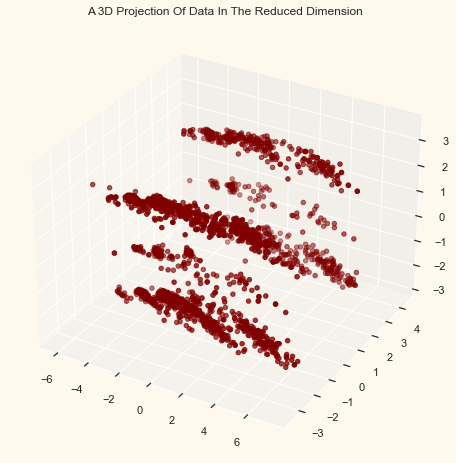

In [164]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### 1. KMeans 

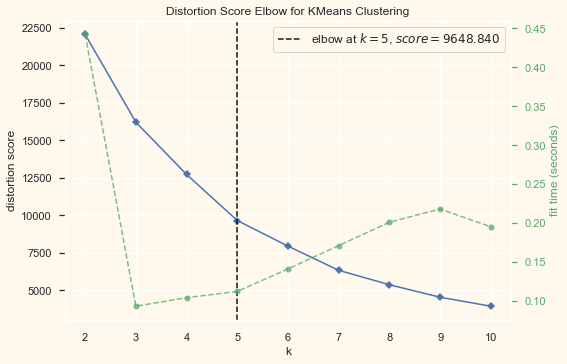

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [169]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [170]:
k_means = KMeans(n_clusters=5, random_state=0).fit(PCA_df)
labels_KM = k_means.labels_

In [172]:
k_means.cluster_centers_

array([[ 3.30802296, -1.82303858, -0.51883614],
       [-2.17562455, -1.02446872, -1.64503801],
       [ 3.73531701,  2.32243404,  0.3819141 ],
       [-1.54313582,  2.9247279 ,  0.32735476],
       [-1.618549  , -1.6842262 ,  2.08106568]])

In [171]:
labels_KM

array([2, 3, 0, ..., 2, 4, 4])

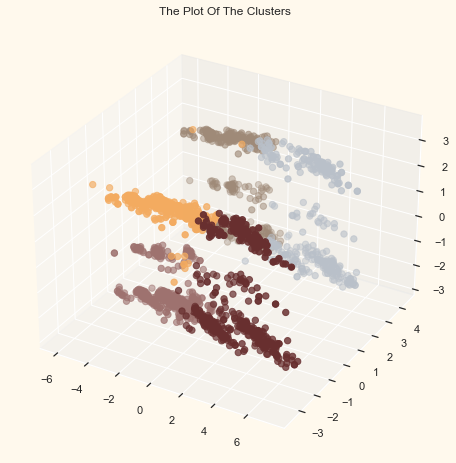

In [174]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=labels_KM, marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

### 2.Hierarchical

In [179]:
clustering = AgglomerativeClustering(5).fit(PCA_df)
labels_HR = clustering.labels_

In [180]:
labels_HR

array([1, 2, 0, ..., 1, 0, 4], dtype=int64)

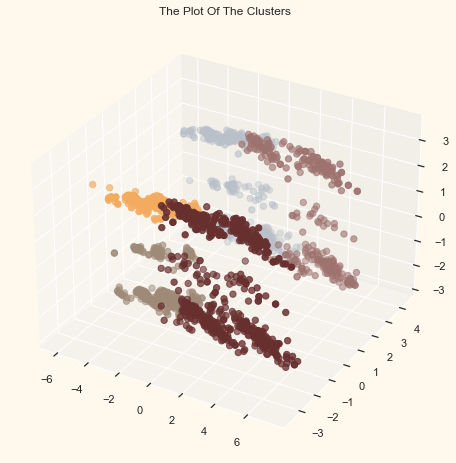

In [181]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=labels_HR, marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

### 3.DBSCAN

In [201]:
clustering = DBSCAN(eps=2, min_samples=300).fit(PCA_df)
labels_DB = clustering.labels_

In [202]:
labels_DB

array([-1, -1, -1, ..., -1, -1,  1], dtype=int64)

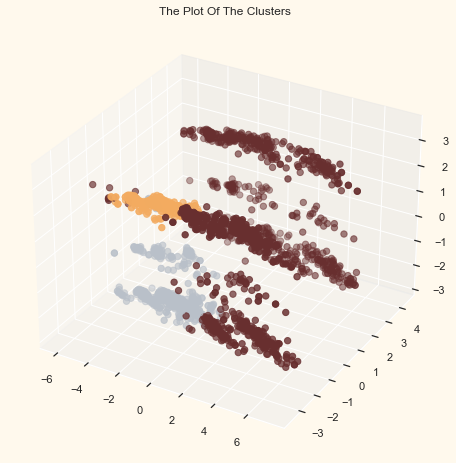

In [203]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=labels_DB, marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

### 4.Gaussian Mixture

In [204]:
clustering = GaussianMixture(n_components=5, random_state=0).fit(PCA_df)
labels_GM = clustering.predict(PCA_df)

In [205]:
labels_GM

array([4, 2, 0, ..., 4, 3, 3], dtype=int64)

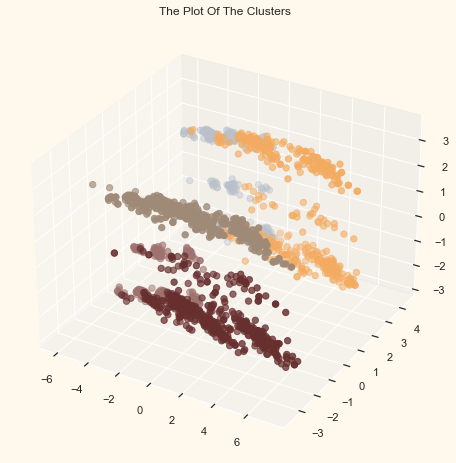

In [206]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=labels_GM, marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [207]:
# silhouette_score of DBSCAN
print("silhouette_score of DBSCAN:",silhouette_score(PCA_df , labels_DB))
# silhouette_score of Hierarchical
print("silhouette_score of Hierarchical:",silhouette_score(PCA_df , labels_HR))
# silhouette_score of Kmeans
print("silhouette_score of Kmeans:",silhouette_score(PCA_df , labels_KM))
# silhouette_score of Gaussian Mixture
print("silhouette_score of Gaussian Mixture:",silhouette_score(PCA_df , labels_GM))

silhouette_score of DBSCAN: 0.19265436902623242
silhouette_score of Hierarchical: 0.3836324562292412
silhouette_score of Kmeans: 0.42732971125304037
silhouette_score of Gaussian Mixture: 0.3207684225586619
